In [ ]:
!pip install "torch==1.4" "torchvision==0.5.0" # ImageDataBunch fix

     |████████████████████████████████| 753.4MB 20kB/s 
     |████████████████████████████████| 4.0MB 35.8MB/s 
  Found existing installation: torch 1.5.0+cu101
    Uninstalling torch-1.5.0+cu101:
      Successfully uninstalled torch-1.5.0+cu101
  Found existing installation: torchvision 0.6.0+cu101
    Uninstalling torchvision-0.6.0+cu101:
      Successfully uninstalled torchvision-0.6.0+cu101


In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.vision import *
from fastai.metrics import error_rate
from fastai.imports import *
from fastai.widgets import *
import numpy as np

!curl -s https://course.fast.ai/setup/colab | bash

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Updating fastai...
Done.
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
path = Path(base_dir + 'data/spiders')

In [ ]:
folder = 'wolf'
file = 'urls_wolf.csv'
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
download_images(path/file, dest, max_pics=200)

In [ ]:
folder = 'jumping'
file = 'urls_jumping.csv'
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
download_images(path/file, dest, max_pics=200)

In [ ]:
folder = 'nursery_web'
file = 'urls_nursery.csv'
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
download_images(path/file, dest, max_pics=200)

In [ ]:
folder = 'american_house'
file = 'urls_house.csv'
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
download_images(path/file, dest, max_pics=200)

In [ ]:
folder = 'harvestman'
file = 'urls_harvestman.csv'
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
download_images(path/file, dest, max_pics=200)

In [ ]:
folder = 'grass'
file = 'urls_grass.csv'
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
download_images(path/file, dest, max_pics=200)

In [ ]:
folder = 'black_yellow'
file = 'urls_by.csv'
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
download_images(path/file, dest, max_pics=200)

In [ ]:
folder = 'barn'
file = 'urls_barn.csv'
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
download_images(path/file, dest, max_pics=200)

In [ ]:
folder = 'brown_recluse'
file = 'urls_recluse.csv'
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
download_images(path/file, dest, max_pics=200)

In [ ]:
folder = 'black_widow'
file = 'urls_widow.csv'
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
download_images(path/file, dest, max_pics=200)

In [ ]:
classes = ['wolf','jumping','nursery_web', 'grass', 'brown_recluse', 'black_widow', 'black_yellow', 'barn', 'harvestman', 'american_house']

In [ ]:
np.random.seed(42)
data = ImageDataBunch.from_csv(path, folder=".", valid_pct=0.2, csv_labels='cleaned.csv', ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [ ]:
data.classes

['american_house',
 'barn',
 'black_widow',
 'black_yellow',
 'brown_recluse',
 'grass',
 'harvestman',
 'jumping',
 'nursery_web',
 'wolf']

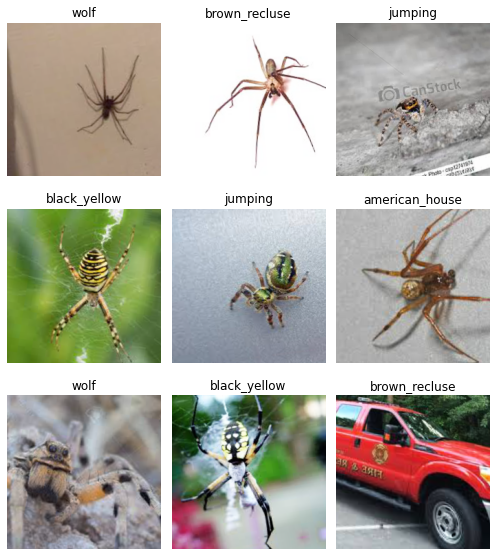

In [ ]:
data.show_batch(rows=3, figsize=(7,8))

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

In [ ]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,error_rate,time
0,2.834164,1.303459,0.403061,00:19
1,1.936426,1.124646,0.316327,00:16
2,1.451700,1.228699,0.331633,00:17
3,1.156156,1.375158,0.336735,00:17
4,0.952789,1.226913,0.301020,00:16
5,0.780460,1.177353,0.321429,00:16
6,0.651438,1.194157,0.326531,00:16
7,0.546695,1.179447,0.316327,00:17
8,0.458183,1.157197,0.316327,00:16
9,0.407940,1.154229,0.316327,00:16


In [ ]:
learn.save('stage-2')

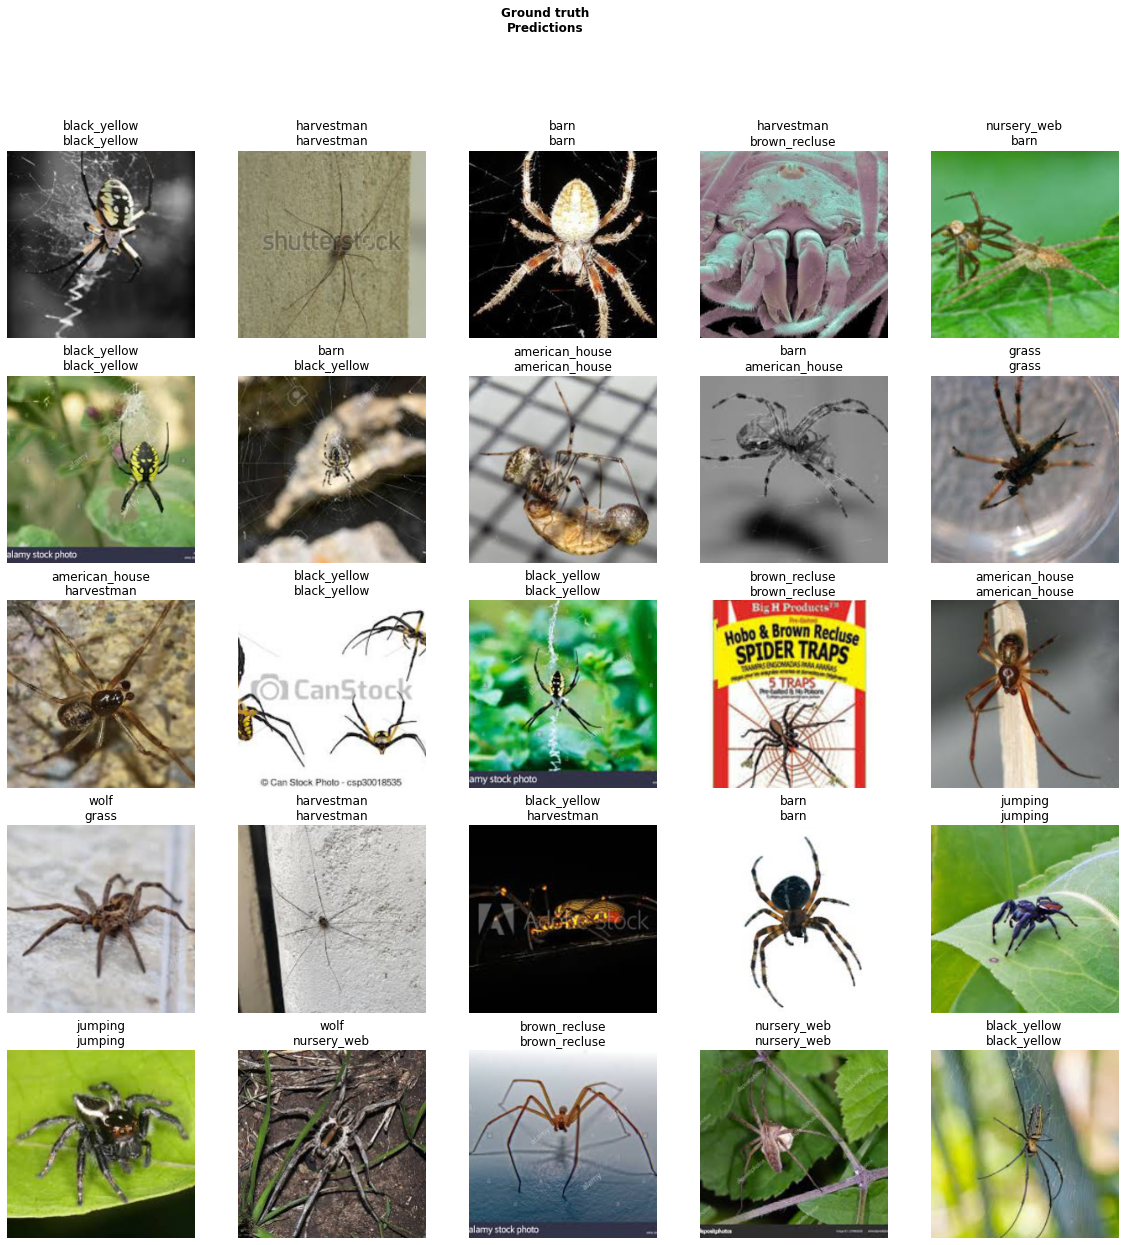

In [ ]:
learn.show_results()

In [ ]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()
learn.fit_one_cycle(4, max_lr=slice(3e-6,8e-6))
learn.save('stage-lr')

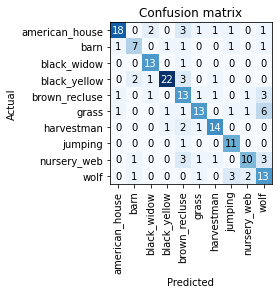

In [ ]:
learn.load('stage-2');
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

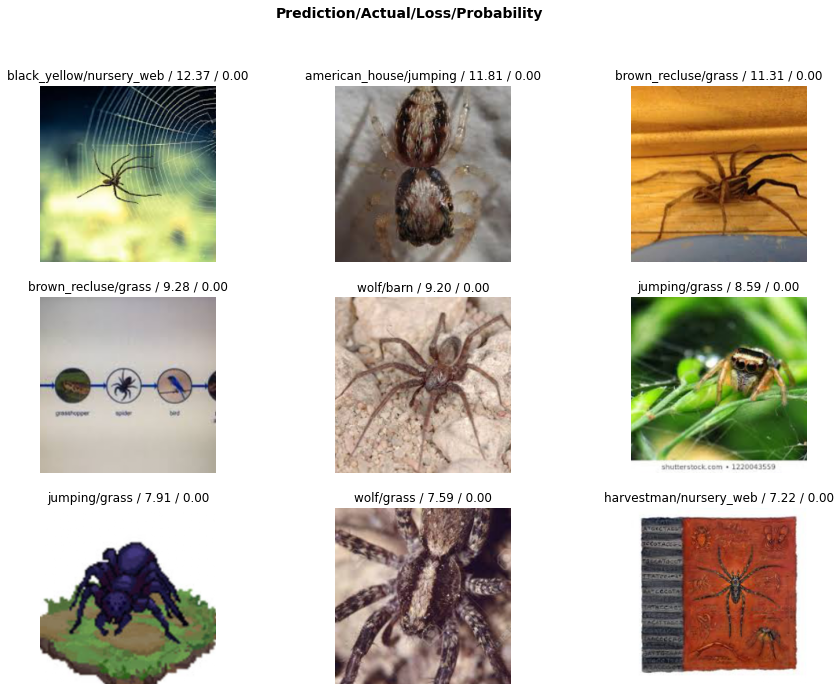

In [ ]:
interp.plot_top_losses(9, figsize=(15,11))

In [ ]:
ds, idxs = DatasetFormatter().from_toplosses(learn)

In [ ]:
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())